### 1.查看HDFS文件结构

In [1]:
import h5py

# 指定HDF5文件路径
hdf5_file_path = r'O:\multicoil_test_full\file_brain_AXFLAIR_200_6002527.h5'

# 打开HDF5文件
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    # 递归打印HDF5文件结构
    def print_hdf5_structure(item, level=0):
        if isinstance(item, h5py.Group):
            print("  " * level + f"Group: {item.name}")
            for key in item.keys():
                print_hdf5_structure(item[key], level + 1)
        elif isinstance(item, h5py.Dataset):
            print("  " * level + f"Dataset: {item.name} (Shape: {item.shape}, Dtype: {item.dtype})")

    # 调用打印函数
    print_hdf5_structure(hdf5_file)


Group: /
  Dataset: /ismrmrd_header (Shape: (), Dtype: object)
  Dataset: /kspace (Shape: (16, 16, 640, 320), Dtype: complex64)
  Dataset: /reconstruction_rss (Shape: (16, 320, 320), Dtype: float32)


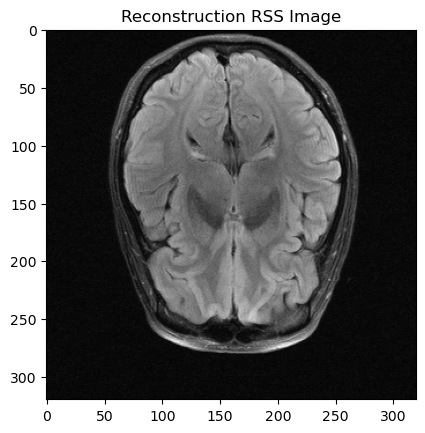

In [2]:
import h5py
import matplotlib.pyplot as plt

# 指定HDF5文件路径
hdf5_file_path = r'O:\multicoil_test_full\file_brain_AXFLAIR_200_6002527.h5'

# 打开HDF5文件
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    # 获取reconstruction_rss数据集
    reconstruction_rss_dataset = hdf5_file['reconstruction_rss']

    # 读取数据到NumPy数组
    reconstruction_rss_data = reconstruction_rss_dataset[()]

    # 显示图像
    plt.imshow(reconstruction_rss_data[0], cmap='gray')  # 这里假设你想查看第一张图像
    plt.title('Reconstruction RSS Image')
    plt.show()


In [3]:
import h5py
import os
import matplotlib.pyplot as plt

# 指定HDF5文件路径
hdf5_file_path = r'O:\multicoil_test_full\file_brain_AXFLAIR_200_6002527.h5'

# 打开HDF5文件
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    # 获取reconstruction_rss数据集
    reconstruction_rss_dataset = hdf5_file['reconstruction_rss']

    # 获取数据集中的所有图像
    all_images = reconstruction_rss_dataset[:]

    # 创建保存图像的目录
    output_directory = r'O:\multicoil_test_full\file_brain_AXFLAIR_200_6002527\reconstruction_rss_images'
    os.makedirs(output_directory, exist_ok=True)

    # 保存所有图像
    for i, image in enumerate(all_images):
        output_path = os.path.join(output_directory, f'reconstruction_rss_image_{i}.png')
        plt.imsave(output_path, image, cmap='gray')

print("图像提取完成")


图像提取完成


In [5]:
import h5py
import os
import matplotlib.pyplot as plt

# 指定输入和输出目录
input_directory = r'O:\multicoil_test_full'
output_directory = r'O:\multicoil_test_full\reconstruction_rss_images'

# 创建保存图像的目录
os.makedirs(output_directory, exist_ok=True)

def extract_and_save_images(hdf5_file_path):
    # 打开HDF5文件
    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        # 获取reconstruction_rss数据集
        if 'reconstruction_rss' in hdf5_file:
            reconstruction_rss_dataset = hdf5_file['reconstruction_rss']

            # 获取文件名（去除路径和扩展名）
            file_name = os.path.splitext(os.path.basename(hdf5_file_path))[0]

            # 保存所有图像
            for i, image in enumerate(reconstruction_rss_dataset):
                output_path = os.path.join(output_directory, f'{file_name}_slice{i + 1}.png')
                plt.imsave(output_path, image, cmap='gray')

# 处理所有HDF5文件
hdf5_files = [f for f in os.listdir(input_directory) if f.endswith('.h5')]
for hdf5_file in hdf5_files:
    hdf5_file_path = os.path.join(input_directory, hdf5_file)
    extract_and_save_images(hdf5_file_path)

print("图像提取完成")


图像提取完成


In [6]:
from PIL import Image
import os

# 指定图像文件夹路径
image_folder = r'O:\multicoil_test_full\reconstruction_rss_images'

# 获取文件夹中所有PNG图像的文件列表
png_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]

# 创建一个字典用于统计不同尺寸的数量
size_count = {}

# 遍历所有PNG文件
for png_file in png_files:
    image_path = os.path.join(image_folder, png_file)

    # 打开图像并获取尺寸
    img = Image.open(image_path)
    img_size = img.size

    # 将尺寸作为键，统计数量
    size_count[img_size] = size_count.get(img_size, 0) + 1

# 打印结果
print("不同尺寸的PNG图像数量统计:")
for size, count in size_count.items():
    print(f"尺寸 {size}: {count} 个图像")


不同尺寸的PNG图像数量统计:
尺寸 (320, 320): 1648 个图像
尺寸 (260, 320): 48 个图像
尺寸 (276, 276): 16 个图像
尺寸 (270, 320): 46 个图像
尺寸 (280, 320): 16 个图像
尺寸 (384, 384): 1056 个图像
